<a href="https://colab.research.google.com/github/Ymin-2/ESAA/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 데이터 압축해제
import zipfile
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

zip = '/content/drive/MyDrive/BDA/rtu_data_full.csv.zip'
rtu_data_full = '/content/drive/MyDrive/BDA/' # 압축을 풀 경로

with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(rtu_data_full)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요한 컬럼만 선택
selected_cols = [
    'localtime', # 시간축
    'activePower', # 유효전력
    'powerFactorR',
    'powerFactorS',
    'powerFactorT',
    'reactivePowerLagging',
    'accumActiveEnergy'
]

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/BDA/rtu_data_full.csv', usecols=selected_cols)

In [ ]:
# 전체 데이터 확인
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696013 entries, 0 to 33696012
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   localtime             int64  
 1   activePower           float64
 2   powerFactorR          float64
 3   powerFactorS          float64
 4   powerFactorT          float64
 5   reactivePowerLagging  float64
 6   accumActiveEnergy     int64  
dtypes: float64(5), int64(2)
memory usage: 1.8 GB
None
(33696013, 7)


In [ ]:
# 결측치 확인
print(df.isnull().sum())

localtime               0
activePower             0
powerFactorR            0
powerFactorS            0
powerFactorT            0
reactivePowerLagging    0
accumActiveEnergy       0
dtype: int64


In [ ]:
df.describe()

,localtime,activePower,powerFactorR,powerFactorS,powerFactorT,reactivePowerLagging,accumActiveEnergy
count,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07,3.369601e+07
mean,2.024839e+13,3.009952e+03,9.246882e+01,9.247004e+01,9.246884e+01,6.019452e+02,8.103413e+06
std,3.665090e+09,7.171454e+02,4.405299e+00,4.405555e+00,4.405619e+00,2.290785e+02,3.344950e+06
min,2.024120e+13,8.644400e+02,6.000000e+01,6.000000e+01,6.000000e+01,8.944000e+01,1.129004e+06
25%,2.025011e+13,2.503820e+03,8.873000e+01,8.873000e+01,8.873000e+01,4.231400e+02,5.393998e+06
50%,2.025021e+13,3.009850e+03,9.249000e+01,9.249000e+01,9.249000e+01,5.739700e+02,8.103386e+06
75%,2.025032e+13,3.515890e+03,9.624000e+01,9.625000e+01,9.624000e+01,7.554100e+02,1.081253e+07
max,2.025043e+13,5.220930e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.550630e+03,1.543817e+07


In [ ]:
# localtime을 datetime 형식으로 변환
df['localtime'] = pd.to_datetime(df['localtime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696013 entries, 0 to 33696012
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   localtime             datetime64[ns]
 1   activePower           float64       
 2   powerFactorR          float64       
 3   powerFactorS          float64       
 4   powerFactorT          float64       
 5   reactivePowerLagging  float64       
 6   accumActiveEnergy     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.8 GB


In [ ]:
df.head()

,localtime,activePower,powerFactorR,powerFactorS,powerFactorT,reactivePowerLagging,accumActiveEnergy
0,1970-01-01 05:37:21.201000000,2961.61,87.31,99.71,89.45,785.37,1955004
1,1970-01-01 05:37:21.201000005,3017.48,87.54,87.67,94.17,376.57,1955008
2,1970-01-01 05:37:21.201000010,2408.01,85.46,99.00,94.45,296.08,1955011
3,1970-01-01 05:37:21.201000015,3289.33,85.24,99.53,95.61,488.48,1955016
4,1970-01-01 05:37:21.201000020,3069.31,92.81,91.26,91.82,604.70,1955020


#**EDA**

In [ ]:
cols = ['powerFactorR', 'powerFactorS', 'powerFactorT', 'reactivePowerLagging', 'accumActiveEnergy']

In [ ]:
# 빠른 시각화를 위해 10%만 사용하여 샘플링
df_sample = df[cols].sample(frac=0.1, random_state=42)

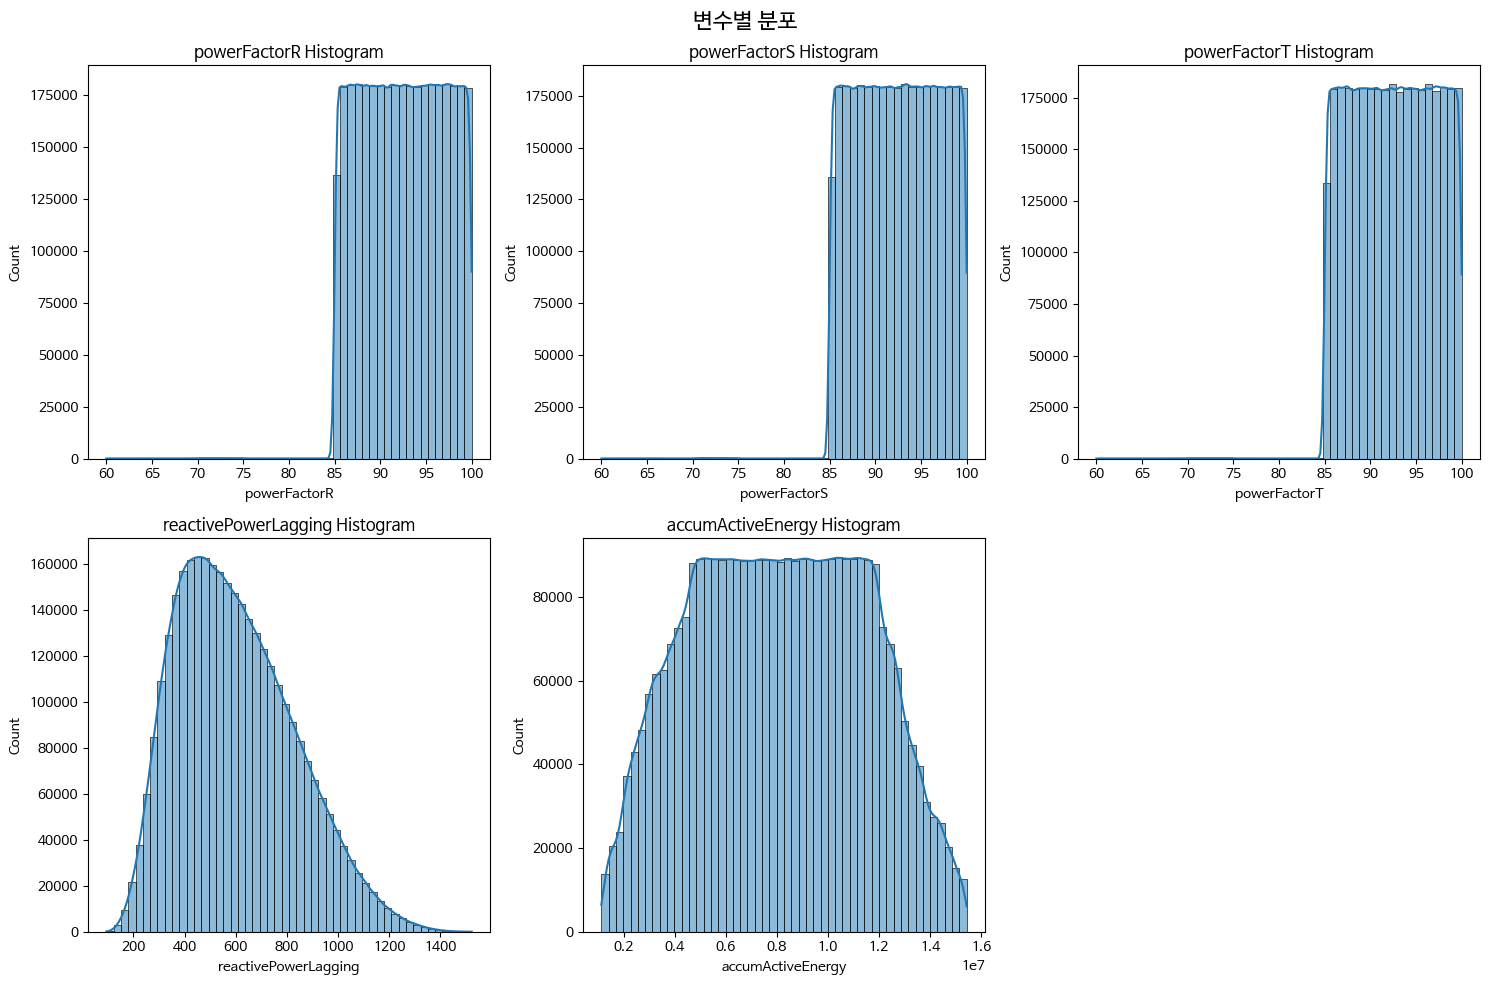

In [ ]:
# 히스토그램
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes_flat = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df_sample, x=col, bins=50, kde=True, ax=axes_flat[i])
    axes_flat[i].set_title(f'{col} Histogram')

# 남는 서브플롯 제거
for i in range(len(cols), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.suptitle('변수별 분포', fontsize=16)
plt.tight_layout()
plt.show()

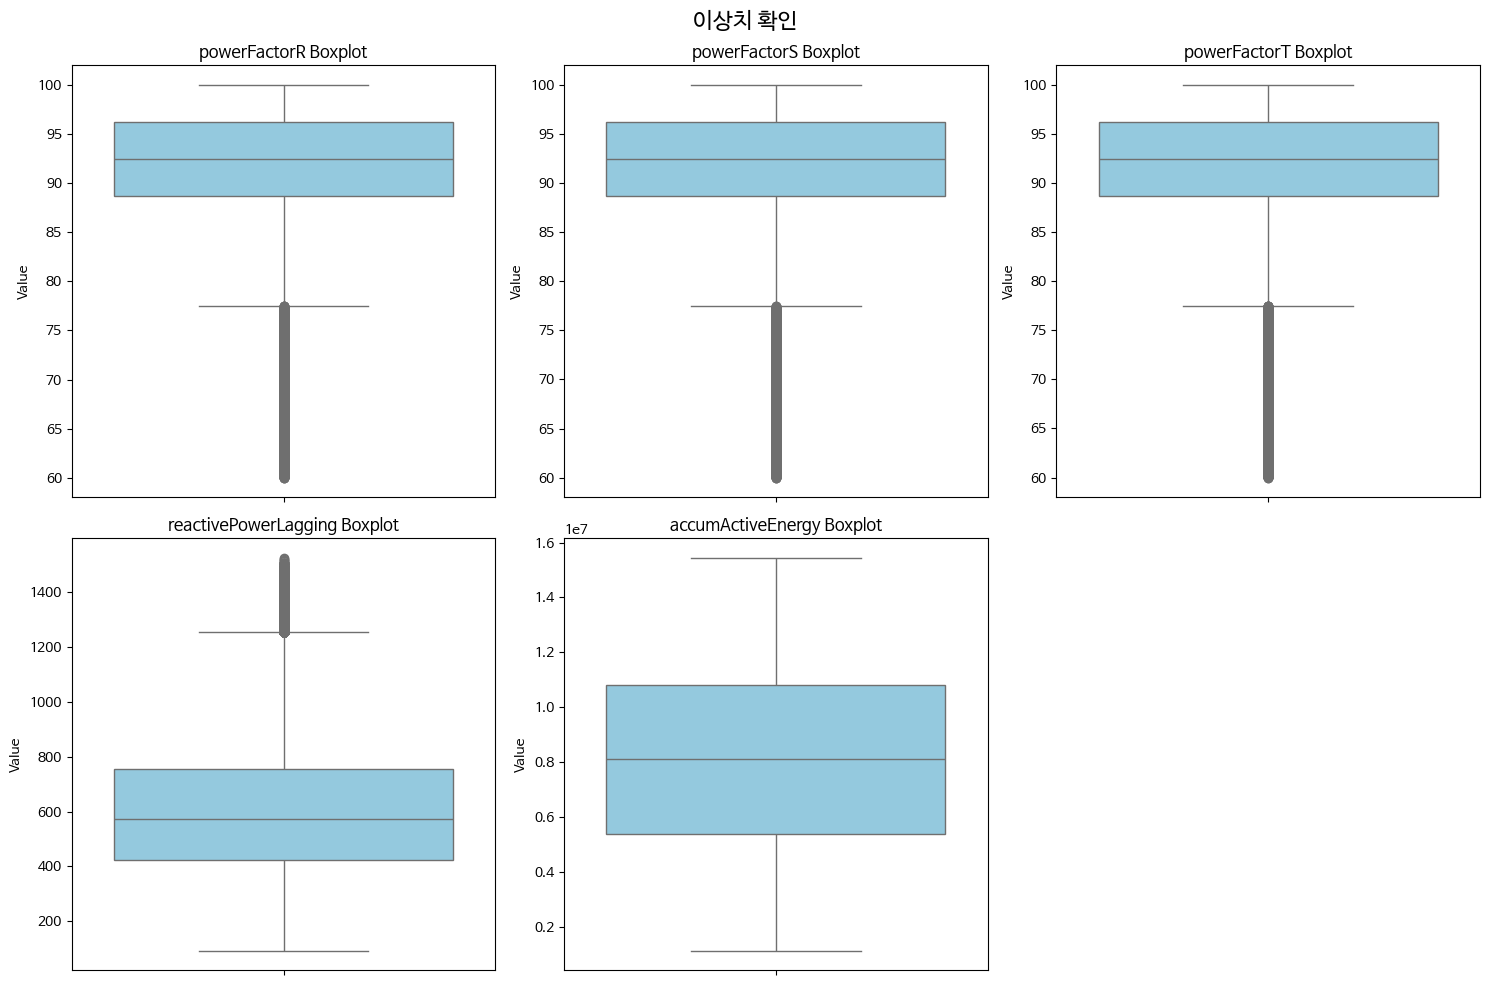

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes_flat = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df_sample[col], ax=axes_flat[i], color='skyblue')
    axes_flat[i].set_title(f'{col} Boxplot')
    axes_flat[i].set_ylabel('Value')

# 남는 서브플롯 제거
for i in range(len(cols), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.suptitle('이상치 확인', fontsize=16)
plt.tight_layout()
plt.show()

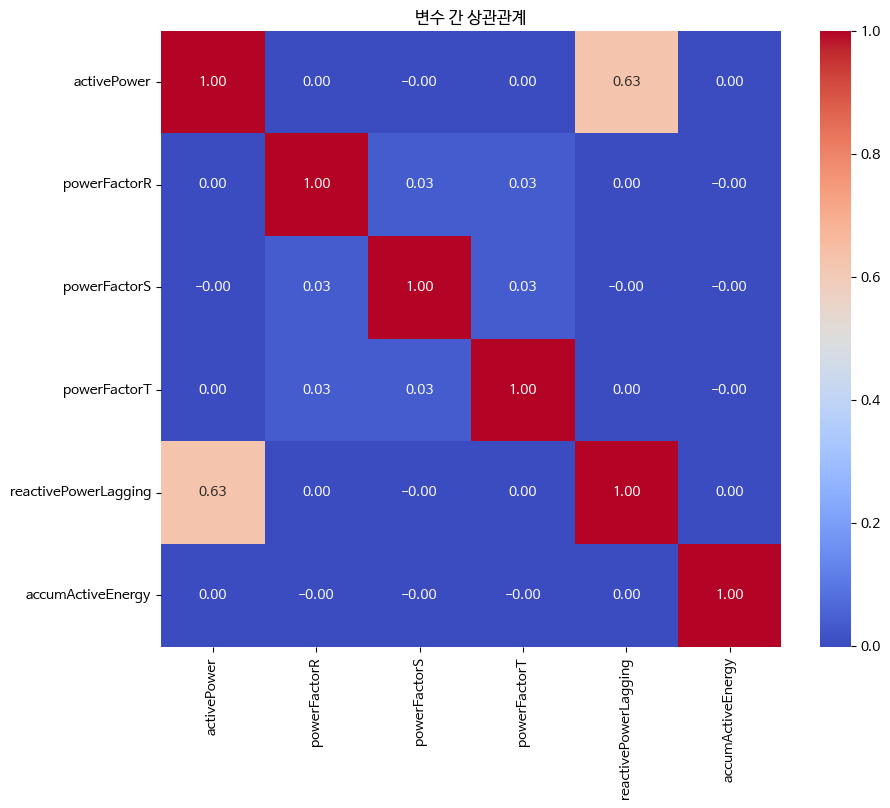

In [ ]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('변수 간 상관관계')
plt.show()

#**전처리**

In [ ]:
# 시간 정렬
df = df.sort_values('localtime').reset_index(drop=True)

In [ ]:
# 시간 파생변수
df['month'] = df['localtime'].dt.month # 계절성
df['day'] = df['localtime'].dt.day # 월초/월말
df['hour'] = df['localtime'].dt.hour # 일조량
df['weekday'] = df['localtime'].dt.weekday # 요일
df['weekend'] = (df['weekday'] >= 5).astype(int) # 주말

In [ ]:
# 스케일링
from sklearn.preprocessing import RobustScaler

scale_cols = ['powerFactorR', 'powerFactorS', 'powerFactorT', 'reactivePowerLagging']
scaler = RobustScaler()

df[scale_cols] = scaler.fit_transform(df[scale_cols])

display(df[scale_cols].describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
powerFactorR,33696013.0,-0.00,0.59,-4.33,-0.50,0.0,0.50,1.00
powerFactorS,33696013.0,-0.00,0.59,-4.32,-0.50,0.0,0.50,1.00
powerFactorT,33696013.0,-0.00,0.59,-4.33,-0.50,0.0,0.50,1.00
reactivePowerLagging,33696013.0,0.08,0.69,-1.46,-0.45,0.0,0.55,2.94


In [ ]:
# 구간별 실제 전력 사용량
# accum의 차이
df['active_energy_diff'] = df['accumActiveEnergy'].diff()

In [ ]:
# mean powerfactor
df['mean_powerfactor'] = df[['powerFactorR', 'powerFactorS', 'powerFactorT']].mean(axis=1)

In [ ]:
  # 무효전력 비율
  df['reactive_ratio'] = np.where(
      df['activePower'] == 0,
      0,
      df['reactivePowerLagging'] / df['activePower']
  )